In [250]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [251]:
# avrora jikes

trace = pd.read_pickle(
                '/media/arjun/Shared/chaos/output_files_v2/test_actual.pkl'
        ).to_numpy()[10000:15000]
print(trace.shape)

(5000, 100)


In [252]:
entropy = []

dist = np.zeros(100)
for point in trace:
    point = point.flatten()
    dist+=point
#     print(point)
#     if point != 0:
    entropy.append(np.sum(point * np.log2(point)))

/home/arjun/anaconda2/envs/cache_analysis/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log2
  if __name__ == '__main__':
/home/arjun/anaconda2/envs/cache_analysis/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


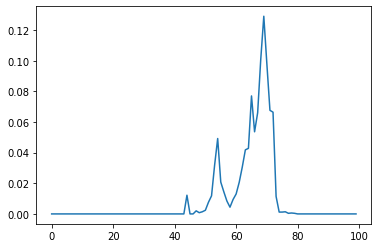

In [253]:
plt.plot(dist/5000)

In [254]:
predictions = np.load('/media/arjun/Shared/chaos/output_files_v2/test_predictions_160.npy')[40:]

In [255]:
entropy_p = []

dist_p = np.zeros(100)
for point in predictions:
    point = point.flatten()
    dist_p += point
    entropy_p.append(np.sum(point * np.log2(1e-10+point)))

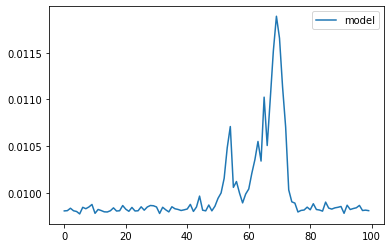

In [256]:
# plt.plot(dist/5000, label="trace")
plt.plot(dist_p/5000, label="model")
plt.legend()

In [257]:
print("Entropy of trace: 0")
print("Entropy of predictions: {}".format(-np.average(entropy_p)))

Entropy of trace: 0
Entropy of predictions: 6.6387226896972065


In [258]:
actual = np.argmax(trace, axis=1).flatten()
predicted = np.argmax(predictions, axis=1).flatten()
print(actual.shape, predicted.shape)

(5000,) (5000,)


In [266]:
# kl divergence
kl_list = []
for i in range(trace.shape[0]):
    actual_dist = trace[i]
    predicted_dist = predictions[i]
    for j in range(actual_dist.shape[0]):
        if actual_dist[j] != 0:
            kl_list.append(-np.log2(1e-10 + predicted_dist[j]))
            break

In [267]:
print("Kl divergence: {}".format(np.average(kl_list)))

Kl divergence: 6.522203546933293


(40, 80)

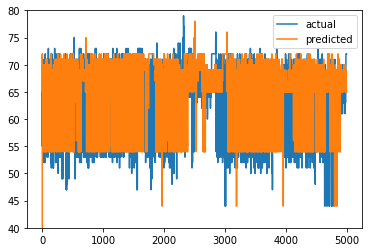

In [260]:
plt.plot(actual, label="actual")
plt.plot(predicted, label="predicted")
plt.legend()
plt.ylim(40, 80)
# plt.xlim(1000, 1100)